### PROBLEM STATEMENT
*"Implement a Shallow Neural Network for the diagnosis of diabetes (Indian Diabetes Dataset)"*

- Ayushmaan Das (E0121037)


### Mounting Drive and Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/Diabetes.csv")

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<hr>

### Basic Analysis of the Dataframe

In [3]:
print(f"ROWS: {df.shape[0]} \t COLUMNS : {df.shape[1]}")

ROWS: 768 	 COLUMNS : 9


In [10]:
print("FEATURES ARE : ", df.columns)

FEATURES ARE :  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [12]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

<hr>

### Feature Selection

In [13]:
X = df.iloc[:, :-1].values
print(X.shape)
X

(768, 8)


array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [15]:
Y = df.iloc[:, -1].values
print(Y.shape)

(768,)


<hr>

### Model Building

Importing Libraries

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD             

Splitting the Dataset

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
print(X_train.shape)
print(y_train.shape)

(614, 8)
(614,)


Defining the Model

In [22]:
model = Sequential()

# INPUT LAYER
model.add(Dense(8, input_dim=8, activation='relu'))

# HIDDEN LAYER
model.add(Dense(8, activation='relu'))

# OUTPUT LAYER
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.9), metrics=['accuracy'])

In [23]:
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)

print(f"\n\nTest loss: {loss}, Test accuracy: {accuracy}")

Epoch 1/100
20/20 [==============================] - 2s 27ms/step - loss: 1.7229 - accuracy: 0.5765 - val_loss: 0.6704 - val_accuracy: 0.6494
Epoch 2/100
20/20 [==============================] - 0s 9ms/step - loss: 0.6882 - accuracy: 0.6368 - val_loss: 0.6756 - val_accuracy: 0.6104
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.7096 - accuracy: 0.5863 - val_loss: 0.6683 - val_accuracy: 0.6234
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.6747 - accuracy: 0.6287 - val_loss: 0.6956 - val_accuracy: 0.6429
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 0.6587 - accuracy: 0.6450 - val_loss: 0.6400 - val_accuracy: 0.6558
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 0.6428 - accuracy: 0.6515 - val_loss: 0.6730 - val_accuracy: 0.6429
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 0.6424 - accuracy: 0.6498 - val_loss: 0.6628 - val_accuracy: 0.6429
Epoch 8/100


Predicting for test data

In [24]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


<hr>

### Model Performance Evaluation

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,  f1_score, precision_score

print("ACCURACY : ", accuracy_score(y_test.astype("int32"), y_pred.astype("int32")))

print("RECALL : ", recall_score(y_test.astype("int32"), y_pred.astype("int32")))

print("PRECISION : ", precision_score(y_test.astype("int32"), y_pred.astype("int32")))

print("F1 : ", f1_score(y_test.astype("int32"), y_pred.astype("int32")))

confusion_matrix(y_test.astype("int32"), y_pred.astype("int32"))

ACCURACY :  0.6428571428571429
RECALL :  0.0
PRECISION :  0.0
F1 :  0.0


C:\Users\Asus vivobook\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[99,  0],
       [55,  0]], dtype=int64)

ROC Curve for the Binary Classification

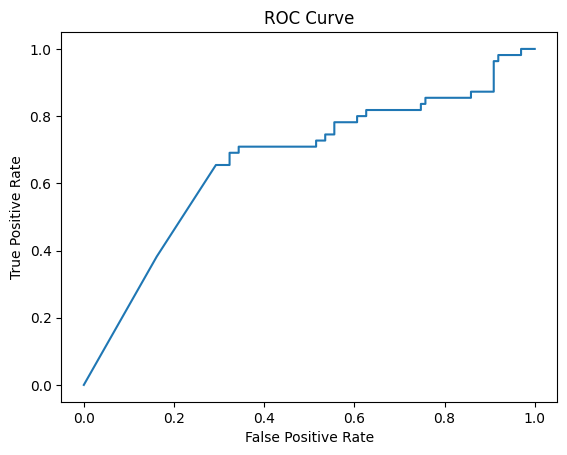

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Precision Recall Curve for the Binary Classification

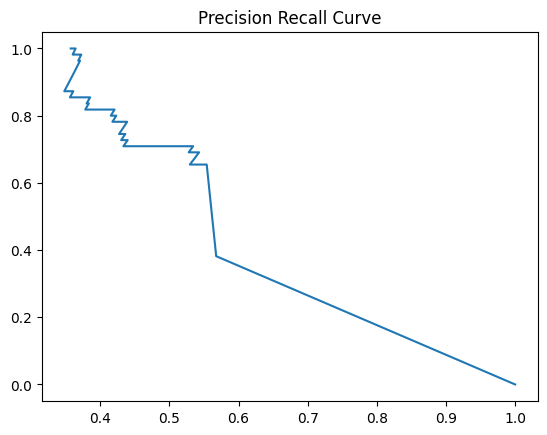

In [32]:
fpr, tpr, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.title('Precision Recall Curve')
plt.show()


<hr><hr>